# Example of Bayesian Personalized Ranking with Matrix Factorization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from tfrs.mf import mf_bpr

In [ ]:
ratings = pd.read_table('./ml-1m/ratings.dat', 
                        sep='::', 
                        header=None, 
                        names=['user_id','movie_id','rating','timestamp'])

In [ ]:
ratings.head()

In [ ]:
def negative_sampler(pos_data):
    pass

## Build the Matrix Factorization model

In [3]:
user_size = 20
item_size = 20
emb_size = 8

In [4]:
params = {"user_size": user_size,
          "item_size": item_size,
          "emb_size": 16,
          "l2_reg": 0.01,
          "optimizer": "gd",
          "epochs": 10,
          "batch_size": 256,
          "verbose": 10,
          "random_seed": 2012,
          "train_writer": "./model/train",
          "test_writer": "./model/test",
          "log_device_placement": False}

In [5]:
model = mf_bpr.MatrixFactorizationBPR(**params)

total_parameters of the model: 640


In [6]:
samples_size = 512
user_input = np.random.randint(0, user_size, size=(samples_size, 1))
pos_item_input = np.random.randint(0, item_size, size=(samples_size, 1))
neg_item_input = np.random.randint(0, item_size, size=(samples_size, 1))

In [7]:
valid_size = 256
valid_user_input = np.random.randint(0, user_size, size=(valid_size, 1))
valid_pos_item_input = np.random.randint(0, item_size, size=(valid_size, 1))
valid_neg_item_input = np.random.randint(0, item_size, size=(valid_size, 1))

In [8]:
history = model.fit(user_input,
                    pos_item_input,
                    neg_item_input,
                    valid_user_input=valid_user_input,
                    valid_pos_item_input=valid_pos_item_input,
                    valid_neg_item_input=valid_neg_item_input,
                    early_stopping=5,
                    save_step=5,
                    save_path="./model",
                    summary_step=10,
                    summary_embedding=True)

Epoch 1/10



0.07s - avg auc: 0.4883 - avg loss: 1.9752 - val auc: 0.4727 - val loss: 1.3422
Epoch 2/10



0.02s - avg auc: 0.4883 - avg loss: 1.9419 - val auc: 0.4727 - val loss: 1.3257
Epoch 3/10



0.03s - avg auc: 0.4883 - avg loss: 1.9095 - val auc: 0.4727 - val loss: 1.3097
Epoch 4/10



0.03s - avg auc: 0.4883 - avg loss: 1.8781 - val auc: 0.4727 - val loss: 1.2941
Epoch 5/10



0.02s - avg auc: 0.4883 - avg loss: 1.8475 - val auc: 0.4727 - val loss: 1.2790
Epoch 6/10



0.02s - avg auc: 0.4883 - avg loss: 1.8178 - val auc: 0.4688 - val loss: 1.2643
Epoch 7/10



0.02s - avg auc: 0.4883 - avg loss: 1.7890 - val auc: 0.4688 - val loss: 1.2499
Epoch 8/10



0.02s - avg auc: 0.4883 - avg loss: 1.7609 - val auc: 0.4688 - val loss: 1.2360
Epoch 9/10



0.02s - avg auc: 0.4883 - avg loss: 1.7337 - val auc: 0.4688 - val loss: 1.2225
Epoch 10/10



0.02s - avg auc: 0.4893 - avg loss: 1.7072 - val auc: 0.4688 - val loss: 1.2093


## Read the training history
or you could run tensorboard during the training with  
$ tensorboard --logdir [model folder]

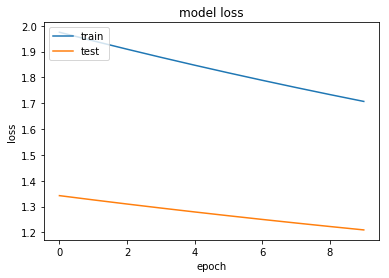

In [9]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

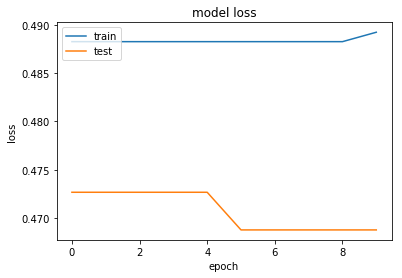

In [10]:
plt.plot(history['auc'])
plt.plot(history['val_auc'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

In [11]:
test_size = 16
test_user_input = np.random.randint(0, user_size, size=(test_size, 1))
test_pos_item_input = np.random.randint(0, item_size, size=(test_size, 1))
test_neg_item_input = np.random.randint(0, item_size, size=(test_size, 1))

In [12]:
model.predict(test_user_input, test_pos_item_input, test_neg_item_input)

[array([[-2.6656469e-02],
        [ 1.2369551e-01],
        [-7.4447654e-03],
        [ 4.7639892e-02],
        [ 0.0000000e+00],
        [-2.8099552e-02],
        [ 4.1762710e-02],
        [ 1.1500592e-02],
        [ 2.2988625e-02],
        [ 1.1789365e-02],
        [ 0.0000000e+00],
        [ 5.2352166e-03],
        [-1.1920044e-04],
        [ 3.3079743e-02],
        [-4.2126045e-02],
        [ 9.4937593e-02]], dtype=float32)]

In [13]:
model.similar(10, ascending=False)

array([[ 1.00000000e+01,  1.80235684e-01],
       [ 1.00000000e+00,  5.75293675e-02],
       [ 1.80000000e+01,  5.38038686e-02],
       [ 1.70000000e+01,  4.14679535e-02],
       [ 4.00000000e+00,  3.66174206e-02],
       [ 1.50000000e+01,  3.16286162e-02],
       [ 2.00000000e+00,  3.13505158e-02],
       [ 1.30000000e+01,  2.46330127e-02],
       [ 3.00000000e+00,  1.93741154e-02],
       [ 1.60000000e+01,  1.81488506e-02],
       [ 9.00000000e+00,  1.45004056e-02],
       [ 8.00000000e+00,  1.28838466e-02],
       [ 0.00000000e+00,  3.04456800e-03],
       [ 1.40000000e+01, -6.75205141e-03],
       [ 1.90000000e+01, -8.31745379e-03],
       [ 7.00000000e+00, -1.73914470e-02],
       [ 6.00000000e+00, -1.86433271e-02],
       [ 1.10000000e+01, -2.59301066e-02],
       [ 5.00000000e+00, -5.11624366e-02],
       [ 1.20000000e+01, -5.53895906e-02]])